In [2]:
from esvizutility.tensorflow.utility import ls
from esvizutility import ising
import numpy as np
import h5py

T = 1.0
stringT = "{0:.3f}".format(T)
L = 64


files = ls('./'+stringT+'/output/', endswith='.dat')


configs = np.zeros((len(files), L, L, 1))
energies = np.zeros((len(files), 1))

FAILURES = 0

for i,f in enumerate(files):
    if i%10==0: print i,
    #if True:
    try:
        configs[i,:,:,0] = np.loadtxt(f)
        energies[i,0] = ising.Hamiltonian(configs[i,:,:,0])
    except:
        FAILURES +=1
        pass

    
with h5py.File(stringT + ".h5",'w') as OF:
    OF.create_dataset('data', data=configs)
    OF.create_dataset('energy', data=energies)
    
        
    

OSError: [Errno 2] No such file or directory: './1.000/output/'

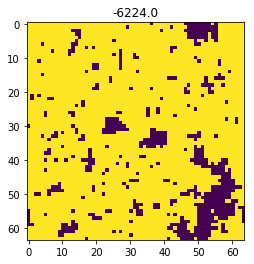

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
    
with h5py.File(str(0.99) + ".h5",'r') as OF:
    d = OF['data'][0,:,:,0]*1.0
    E = OF['energy'][0,0]*1.0 
    
plt.title(E)
plt.imshow(d)
    